In [20]:
import sys
sys.path.insert(0, 'C:/Users/Franco/Documents/AnacondaProjects/Predicting_Conflicts')
from Libs import *
sys.path.insert(0, 'C:/Users/Franco/Documents/AnacondaProjects/Predicting_Conflicts/DataAnalysis/')
from DataSplit import *
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [21]:
# Random Forest Classifier

# Modelo con todas las variables
rf = RandomForestClassifier(n_estimators=1000, random_state=20, n_jobs = -1)
rf.fit(X_train_grouped, y_train_grouped.values.ravel())

rfx = ExtraTreesClassifier(n_estimators=1000, random_state=20, n_jobs=-1)
rfx.fit(X_train, y_train.values.ravel())

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=20, verbose=0, warm_start=False)

In [3]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


In [4]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 13),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=10)

start = time()
random_search.fit(X_train, y_train.values.ravel())
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 70.04 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.873 (std: 0.010)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'min_samples_split': 8}

Model with rank: 2
Mean validation score: 0.871 (std: 0.009)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 9}

Model with rank: 3
Mean validation score: 0.866 (std: 0.008)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_split': 8}



In [22]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=5, random_state=20, n_jobs = -1, bootstrap=False, criterion='gini')
rf.fit(X_train, y_train.values.ravel())

rfx = ExtraTreesClassifier(n_estimators=1000, max_depth=None, min_samples_split=5, random_state=20, n_jobs = -1, bootstrap=False, criterion='gini')
rfx.fit(X_train, y_train.values.ravel())

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=20, verbose=0, warm_start=False)

In [ ]:
# use a full grid over all parameters
param_grid = {"max_depth": [4,5,6,7,8],
              "max_features": ['auto', 'sqrt', 'log2'],
              "min_samples_split": [0.1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(rfx, param_grid=param_grid, cv=5)
start = time()
grid_search.fit(X_train, y_train.values.ravel())

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

In [4]:
# Modelo sin las variables conflict
rf_sin_conflictos = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=5, random_state=20, n_jobs = -1, bootstrap=False, criterion='gini')
rf_sin_conflictos.fit(X_train_sin_conflictos, y_train_sin_conflictos.values.ravel())

# Modelo únicamente con las variables conflict
rf_solo_conflictos = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=5, random_state=20, n_jobs = -1, bootstrap=False, criterion='gini')
rf_solo_conflictos.fit(X_train_solo_conflictos, y_train_solo_conflictos.values.ravel())

# Modelos con 1 variable conflicto a la vez

rf_c3 = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=5, random_state=20, n_jobs = -1, bootstrap=False, criterion='gini')
rf_c3.fit(X_train_c3, y_train_c3.values.ravel())

rf_c5 = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=5, random_state=20, n_jobs = -1, bootstrap=False, criterion='gini')
rf_c5.fit(X_train_c5, y_train_c5.values.ravel())

rf_c10 = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=5, random_state=20, n_jobs = -1, bootstrap=False, criterion='gini')
rf_c10.fit(X_train_c10, y_train_c10.values.ravel())

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=20, verbose=0, warm_start=False)

In [23]:
scores = cross_val_score(rfx, df_train_models.loc[:, ['country encoded', 'year', 'amount', 'Tools', 'Vehicles',                      
                                                        'Weapons', 'Prom Tools', 'Prom Vehicles', 'Prom Weapons', 'conflict-1-to-3', 
                                                        'conflict-4-to-6', 'conflict-7-to-9', 'Prom USA']], 
                         df_train_models.loc[:, ['conflict']].values.ravel(), 
                         cv=10, n_jobs=-1)
print(scores.mean())

scores_rf = cross_val_score(rf, df_train_models.loc[:, ['country encoded', 'year', 'amount', 'Tools', 'Vehicles',                      
                                                        'Weapons', 'Prom Tools', 'Prom Vehicles', 'Prom Weapons', 'conflict-1-to-3', 
                                                        'conflict-4-to-6', 'conflict-7-to-9', 'Prom USA']], 
                         df_train_models.loc[:, ['conflict']].values.ravel(), 
                         cv=10, n_jobs=-1)

print(scores_rf.mean())

0.8674559940966757
0.8791898035579809


In [8]:
print("\nAccuracy\n")
y_pred_randforest = rf.predict(X_test)
print(accuracy_score(y_test, y_pred_randforest))
y_pred_randforest_sin_conflictos = rf_sin_conflictos.predict(X_test_sin_conflictos)
y_pred_randforest_solo_conflictos = rf_solo_conflictos.predict(X_test_solo_conflictos)
print("Random Forest\n\nEntero: {}\nSin conflictos: {}\nSolo conflictos: {}\n".format(accuracy_score(y_test, y_pred_randforest), accuracy_score(y_test_sin_conflictos, y_pred_randforest_sin_conflictos), accuracy_score(y_test_solo_conflictos, y_pred_randforest_solo_conflictos)))

print("\nAccuracy Extremely Randomized Trees")
y_pred_randforest_rfx = rfx.predict(X_test)
print(accuracy_score(y_test, y_pred_randforest_rfx))

y_pred_rf_c3 = rf_c3.predict(X_test_c3)
y_pred_rf_c5 = rf_c5.predict(X_test_c5)
y_pred_rf_c10 = rf_c10.predict(X_test_c10)
print("Pasando de a 1 conflict a la vez:\n\n conflict-3: {}\n\n conflict-5: {}\n\n conflict-10: {}\n".format(accuracy_score(y_test_c3, y_pred_rf_c3), accuracy_score(y_test_c5, y_pred_rf_c5), accuracy_score(y_test_c10, y_pred_rf_c10)))

# Accuracy con el dataframe de validación (Todas las variables)
y_pred_randforest_validation = rf.predict(df_validation_data)
print("\nRandom Forest validation dataframe\n{}".format(accuracy_score(df_validation_target, y_pred_randforest_validation)))

y_pred_randforest_rfx_validation = rfx.predict(df_validation_data)
print("\nExtremely Randomized Trees validation dataframe\n{}".format(accuracy_score(df_validation_target, y_pred_randforest_rfx_validation)))


Accuracy

0.8793296089385475
Random Forest

Entero: 0.8793296089385475
Sin conflictos: 0.8754189944134079
Solo conflictos: 0.8793296089385475


Accuracy Extremely Randomized Trees
0.8675977653631285
Pasando de a 1 conflict a la vez:

 conflict-3: 0.8793296089385475

 conflict-5: 0.8726256983240224

 conflict-10: 0.8798882681564246


Random Forest validation dataframe
0.8855345911949686

Extremely Randomized Trees validation dataframe
0.8591194968553459


In [8]:
# Matriz de confusión
y_pred_randforest = rf.predict(X_test)
y_pred_randforest_rfx = rfx.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_randforest)
print("\nRandForest:\n {}".format(cm_rf))

cm_rfx = confusion_matrix(y_test, y_pred_randforest_rfx)
print("\nExtremely Randomized Trees:\n {}".format(cm_rfx))


RandForest:
 [[1471   24]
 [ 185  110]]

Extremely Randomized Trees:
 [[1489    6]
 [ 217   78]]


In [9]:
## Matriz de confusión dataframe de validacion
cm_rf_validation = confusion_matrix(df_validation_target, y_pred_randforest_validation)
print("\nRandom Forest validation dataframe:\n{}".format(cm_rf_validation))

# Matriz de confusion variables conflict
cm_rf_c3 = confusion_matrix(y_test_c3, y_pred_rf_c3)
cm_rf_c5 = confusion_matrix(y_test_c5, y_pred_rf_c5)
cm_rf_c10 = confusion_matrix(y_test_c10, y_pred_rf_c10)
print("\nConflict-3 \n{}\nConflict-5 \n{}\nConflict-10 \n{}\n".format(cm_rf_c3, cm_rf_c5, cm_rf_c10))


RandForest:
 [[1469   27]
 [ 189  105]]

Extremely Randomized Trees:
 [[1480   16]
 [ 221   73]]

Random Forest validation dataframe:
[[650   8]
 [ 83  54]]

Conflict-3 
[[1445   35]
 [ 181  129]]
Conflict-5 
[[1449   24]
 [ 204  113]]
Conflict-10 
[[1472   25]
 [ 190  103]]



In [9]:
y_test['conflict'].value_counts()

False    1495
True      295
Name: conflict, dtype: int64

In [10]:
y_test['conflict'].mean()

0.164804469273743

In [11]:
1 - y_test['conflict'].mean()

0.835195530726257

In [12]:
y_pred_prob = rf.predict_proba(X_test)[:, 1]
print(y_pred_prob[:5])

[0.00416667 0.35383333 0.59158333 0.00633333 0.13733333]


In [13]:
%matplotlib inline
plt.rcParams['font.size'] = 14

(0, 1)

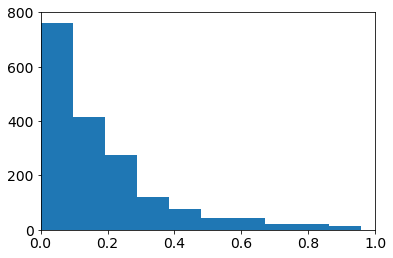

In [14]:
plt.hist(y_pred_prob, bins = 10)
plt.xlim(0, 1)

In [15]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.32)[0]

In [16]:
y_pred_class[:]

array([0., 1., 1., ..., 1., 0., 0.])

In [17]:
print(cm_rf)

[[1471   24]
 [ 185  110]]


In [18]:
print(confusion_matrix(y_test, y_pred_class))

[[1386  109]
 [ 119  176]]


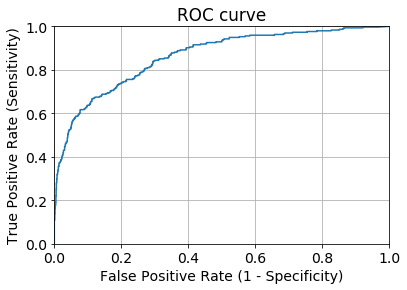

In [19]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [33]:
for x in range(10):
    print(x)

0
1
2
3
4
5
6
7
8
9


In [104]:
rang = np.arange(0, 1, 0.05)
arr_confusion_matrix = []


for x in rang:
    y_pred_class = binarize([y_pred_prob], x)[0]
    confusionMatrix=confusion_matrix(y_test, y_pred_class)
    falsePositive = confusionMatrix[1][0]
    falseNegative = confusionMatrix[0][1]
    total = confusionMatrix[0][0] + confusionMatrix[1][1]
    
    arr_confusion_matrix.append([falsePositive, falseNegative, total, x])
    
    print(confusionMatrix)

[[  50 1445]
 [   1  294]]
[[ 437 1058]
 [   9  286]]
[[764 731]
 [ 21 274]]
[[982 513]
 [ 40 255]]
[[1136  359]
 [  68  227]]
[[1278  217]
 [  92  203]]
[[1365  130]
 [ 113  182]]
[[1407   88]
 [ 126  169]]
[[1437   58]
 [ 155  140]]
[[1461   34]
 [ 178  117]]
[[1471   24]
 [ 185  110]]
[[1480   15]
 [ 197   98]]
[[1486    9]
 [ 220   75]]
[[1488    7]
 [ 239   56]]
[[1492    3]
 [ 248   47]]
[[1493    2]
 [ 257   38]]
[[1495    0]
 [ 270   25]]
[[1495    0]
 [ 280   15]]
[[1495    0]
 [ 284   11]]
[[1495    0]
 [ 293    2]]


In [105]:
arr_confusion_matrix = np.array(arr_confusion_matrix)

In [106]:
arr_confusion_matrix

array([[1.000e+00, 1.445e+03, 3.440e+02, 0.000e+00],
       [9.000e+00, 1.058e+03, 7.230e+02, 5.000e-02],
       [2.100e+01, 7.310e+02, 1.038e+03, 1.000e-01],
       [4.000e+01, 5.130e+02, 1.237e+03, 1.500e-01],
       [6.800e+01, 3.590e+02, 1.363e+03, 2.000e-01],
       [9.200e+01, 2.170e+02, 1.481e+03, 2.500e-01],
       [1.130e+02, 1.300e+02, 1.547e+03, 3.000e-01],
       [1.260e+02, 8.800e+01, 1.576e+03, 3.500e-01],
       [1.550e+02, 5.800e+01, 1.577e+03, 4.000e-01],
       [1.780e+02, 3.400e+01, 1.578e+03, 4.500e-01],
       [1.850e+02, 2.400e+01, 1.581e+03, 5.000e-01],
       [1.970e+02, 1.500e+01, 1.578e+03, 5.500e-01],
       [2.200e+02, 9.000e+00, 1.561e+03, 6.000e-01],
       [2.390e+02, 7.000e+00, 1.544e+03, 6.500e-01],
       [2.480e+02, 3.000e+00, 1.539e+03, 7.000e-01],
       [2.570e+02, 2.000e+00, 1.531e+03, 7.500e-01],
       [2.700e+02, 0.000e+00, 1.520e+03, 8.000e-01],
       [2.800e+02, 0.000e+00, 1.510e+03, 8.500e-01],
       [2.840e+02, 0.000e+00, 1.506e+03, 9.000

In [107]:
arr_confusion_matrix.T

array([[1.000e+00, 9.000e+00, 2.100e+01, 4.000e+01, 6.800e+01, 9.200e+01,
        1.130e+02, 1.260e+02, 1.550e+02, 1.780e+02, 1.850e+02, 1.970e+02,
        2.200e+02, 2.390e+02, 2.480e+02, 2.570e+02, 2.700e+02, 2.800e+02,
        2.840e+02, 2.930e+02],
       [1.445e+03, 1.058e+03, 7.310e+02, 5.130e+02, 3.590e+02, 2.170e+02,
        1.300e+02, 8.800e+01, 5.800e+01, 3.400e+01, 2.400e+01, 1.500e+01,
        9.000e+00, 7.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [3.440e+02, 7.230e+02, 1.038e+03, 1.237e+03, 1.363e+03, 1.481e+03,
        1.547e+03, 1.576e+03, 1.577e+03, 1.578e+03, 1.581e+03, 1.578e+03,
        1.561e+03, 1.544e+03, 1.539e+03, 1.531e+03, 1.520e+03, 1.510e+03,
        1.506e+03, 1.497e+03],
       [0.000e+00, 5.000e-02, 1.000e-01, 1.500e-01, 2.000e-01, 2.500e-01,
        3.000e-01, 3.500e-01, 4.000e-01, 4.500e-01, 5.000e-01, 5.500e-01,
        6.000e-01, 6.500e-01, 7.000e-01, 7.500e-01, 8.000e-01, 8.500e-01,
        9.000e-01, 

In [108]:
xx = arr_confusion_matrix.T[3]


In [109]:
y0 = arr_confusion_matrix.T[0]
y1 = arr_confusion_matrix.T[1]
y2 = arr_confusion_matrix.T[2]

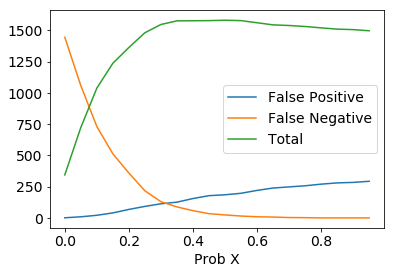

In [110]:
plt.plot(xx, y0, label = 'False Positive')
plt.plot(xx, y1, label = 'False Negative')
plt.plot(xx, y2, label = 'Total')

plt.xlabel('Prob X')
plt.legend()
plt.show()